# 安装 deap（遗传算法库）

In [1]:
!pip install deap matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


# 导入所需库

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# 定义问题参数和矩阵

In [21]:
tasks = 10  # 任务数量
robots = 5  # 机器人数量

In [22]:
# 时间矩阵 (表示每个机器人完成每个任务的时间)
time_matrix = np.array([
    [8, 6, 7, 10, 5, 9, 8, 6, 7, 10],
    [7, 8, 6, 7, 9, 8, 6, 7, 8, 9],
    [6, 7, 8, 6, 7, 8, 9, 7, 6, 8],
    [9, 7, 6, 8, 9, 7, 8, 9, 7, 6],
    [8, 9, 7, 8, 6, 7, 8, 9, 8, 7]
])

In [23]:
# 资源消耗矩阵 (表示每个机器人完成每个任务的资源消耗)
resource_matrix = np.array([
    [12, 9, 10, 13, 7, 11, 10, 9, 11, 14],
    [10, 12, 9, 10, 12, 10, 9, 11, 12, 11],
    [9, 11, 12, 9, 11, 12, 13, 10, 9, 12],
    [13, 10, 9, 12, 13, 10, 11, 12, 10, 9],
    [11, 13, 11, 12, 10, 9, 12, 13, 11, 12]
])

In [24]:
# 安全系数矩阵 (表示每个机器人执行每个任务的安全性)
safety_matrix = np.array([
    [0.9, 0.7, 0.8, 0.9, 0.6, 0.8, 0.9, 0.7, 0.8, 0.9],
    [0.8, 0.9, 0.7, 0.8, 0.9, 0.8, 0.7, 0.8, 0.9, 0.7],
    [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.8, 0.9, 0.7, 0.8],
    [0.9, 0.8, 0.7, 0.9, 0.9, 0.8, 0.8, 0.9, 0.7, 0.8],
    [0.8, 0.9, 0.8, 0.8, 0.7, 0.9, 0.9, 0.8, 0.8, 0.9]
])

# 定义适应度函数 

In [36]:

def eval_individual(individual):
    total_time = np.max([time_matrix[individual[i], i] for i in range(tasks)])
    total_resources = np.sum([resource_matrix[individual[i], i] for i in range(tasks)])
    total_safety = np.sum([safety_matrix[individual[i], i] for i in range(tasks)])
    
    # 最小化时间和资源消耗，同时最大化安全性
    return total_time, total_resources, -total_safety

# 定义遗传算法的个体与种群

In [37]:
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0,-1.0))  # 最小化两个目标，最大化一个目标
creator.create("Individual", list, fitness=creator.FitnessMulti)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


# 初始化工具箱

In [38]:
toolbox = base.Toolbox()

# 定义个体生成函数：随机分配任务到机器人
toolbox.register("indices", np.random.randint, 0, robots)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.indices, n=tasks)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# 注册遗传算法的操作
# 交叉操作，这里使用两点交叉
toolbox.register("mate", tools.cxTwoPoint)
# 变异操作，随机改变个体基因的值，变异概率为 5%
toolbox.register("mutate", tools.mutUniformInt, low=0, up=robots-1, indpb=0.05)
# 选择操作，使用 NSGA-II 选择方法
toolbox.register("select", tools.selNSGA2)
# 评估个体适应度
toolbox.register("evaluate", eval_individual)

# 运行遗传算法

In [47]:
def run_ga():
    pop = toolbox.population(n=50)  # 种群大小为50
    hof = tools.ParetoFront()  # 保存最优解
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean, axis=0)
    stats.register("std", np.std, axis=0)
    stats.register("min", np.min, axis=0)
    stats.register("max", np.max, axis=0)
    
    logbook = tools.Logbook()  # 用于记录每一代的统计信息
    logbook.header = ["gen", "evals"] + stats.fields

    # 运行遗传算法
    pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu=50, lambda_=100, cxpb=0.7, mutpb=0.2, ngen=200, 
                                         stats=stats, halloffame=hof, verbose=True)
    
    # 记录每代的统计信息
    for rec in log:
        logbook.record(evals=len(pop), **rec)

    return pop, logbook, hof
pop, logbook, hof = run_ga()

gen	nevals	avg                   	std                               	min             	max                
0  	50    	[  9.16 107.44  -8.04]	[0.5425864  4.65256918 0.23916521]	[ 8.  94.  -8.6]	[ 10.  117.   -7.5]
1  	94    	[  8.84  105.36   -8.092]	[0.50438081 5.75068692 0.3032095 ]	[ 8.  94.  -8.7]	[ 10.  118.   -7.4]
2  	93    	[  8.64  105.48   -8.184]	[0.52       7.14769893 0.38385414]	[ 8.  92.  -8.8]	[ 10.  118.   -7.4]
3  	84    	[  8.5  103.64  -8.13]   	[0.53851648 8.23106311 0.44418465]	[ 8.  92.  -8.8]	[ 10.  118.   -7.5]
4  	86    	[ 8.24  98.94  -7.942]   	[0.42708313 6.78648657 0.39602525]	[ 8.  92.  -8.8]	[  9.  117.   -7.4]
5  	93    	[ 8.32  99.94  -8.038]   	[0.5075431  7.60107887 0.45117181]	[ 7.  92.  -8.9]	[  9.  116.   -7.4]
6  	95    	[ 8.16  96.06  -7.808]   	[0.46303348 6.83054903 0.43719103]	[ 7.  92.  -8.9]	[  9.  116.   -7.5]
7  	91    	[ 8.32  99.12  -8.122]   	[0.64621978 6.71904755 0.36402747]	[ 7.  91.  -8.9]	[  9.  116.   -7.5]
8  	90    	[ 8.12  99.36 

83 	89    	[  8.12  100.66   -8.316]	[0.73864741 6.94437902 0.45403084]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
84 	94    	[ 7.98  99.82  -8.252]   	[0.67793805 7.39645861 0.47591596]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
85 	92    	[  8.06 100.14  -8.28]   	[0.67557383 7.13024544 0.45912961]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
86 	92    	[  8.06  100.7    -8.302]	[0.73239334 7.76981338 0.49294624]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
87 	86    	[ 7.94  99.56  -8.236]   	[0.7045566  6.9286651  0.45946055]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
88 	90    	[  7.96  100.1    -8.264]	[0.69166466 7.18401002 0.47318495]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
89 	91    	[ 7.94 99.2  -8.2 ]      	[0.75921012 7.50732975 0.5       ]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
90 	88    	[ 8.    99.34  -8.224]   	[0.69282032 7.32013661 0.47981663]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
91 	97    	[ 7.9   98.64  -8.174]   	[0.7        7.26294706 0.47825098]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
92 	92    	[ 7.96 9

163	91    	[ 7.9   99.4   -8.214]   	[0.72801099 7.45922248 0.49071784]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
164	88    	[ 7.84  99.42  -8.218]   	[0.70313583 6.86466314 0.44841499]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
165	92    	[  7.86  100.     -8.242]	[0.74859869 7.13582511 0.47120696]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
166	91    	[ 7.92  99.44  -8.224]   	[0.71665891 7.15586473 0.47055712]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
167	93    	[ 7.94  99.98  -8.254]   	[0.7045566  7.43098917 0.48340873]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
168	87    	[ 7.84  99.88  -8.238]   	[0.67409198 7.34476684 0.47995416]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
169	89    	[ 7.92  99.32  -8.214]   	[0.77045441 6.94100857 0.46043892]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
170	87    	[ 7.88  99.3   -8.208]   	[0.71105555 6.97208721 0.46939962]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
171	77    	[ 7.9   99.78  -8.248]   	[0.7        6.70310376 0.44056328]	[ 7. 89. -9.]   	[  9.  113.   -7.4]
172	91    	[ 7.84  

# 结果可视化

In [48]:
gen = logbook.select("gen")
avg_time, avg_resources, avg_safety = np.array(logbook.select("avg")).T
min_time, min_resources, min_safety = np.array(logbook.select("min")).T

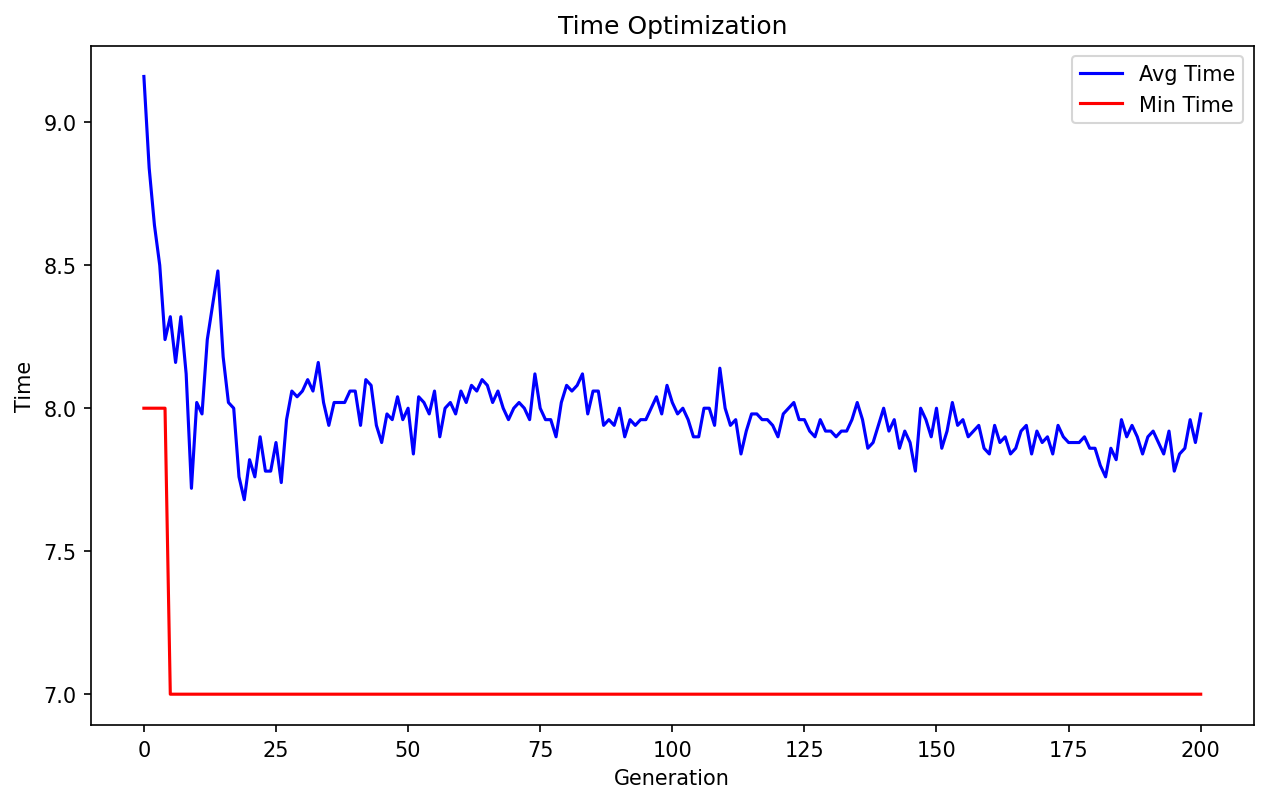

In [49]:
# 绘制时间优化图片
plt.figure(figsize=(10, 6),dpi=150)
plt.plot(gen, avg_time, label="Avg Time", color='blue')
plt.plot(gen, min_time, label="Min Time", color='red')
plt.xlabel("Generation")
plt.ylabel("Time")
plt.title("Time Optimization")
plt.legend()
plt.savefig('time_optimization.png')

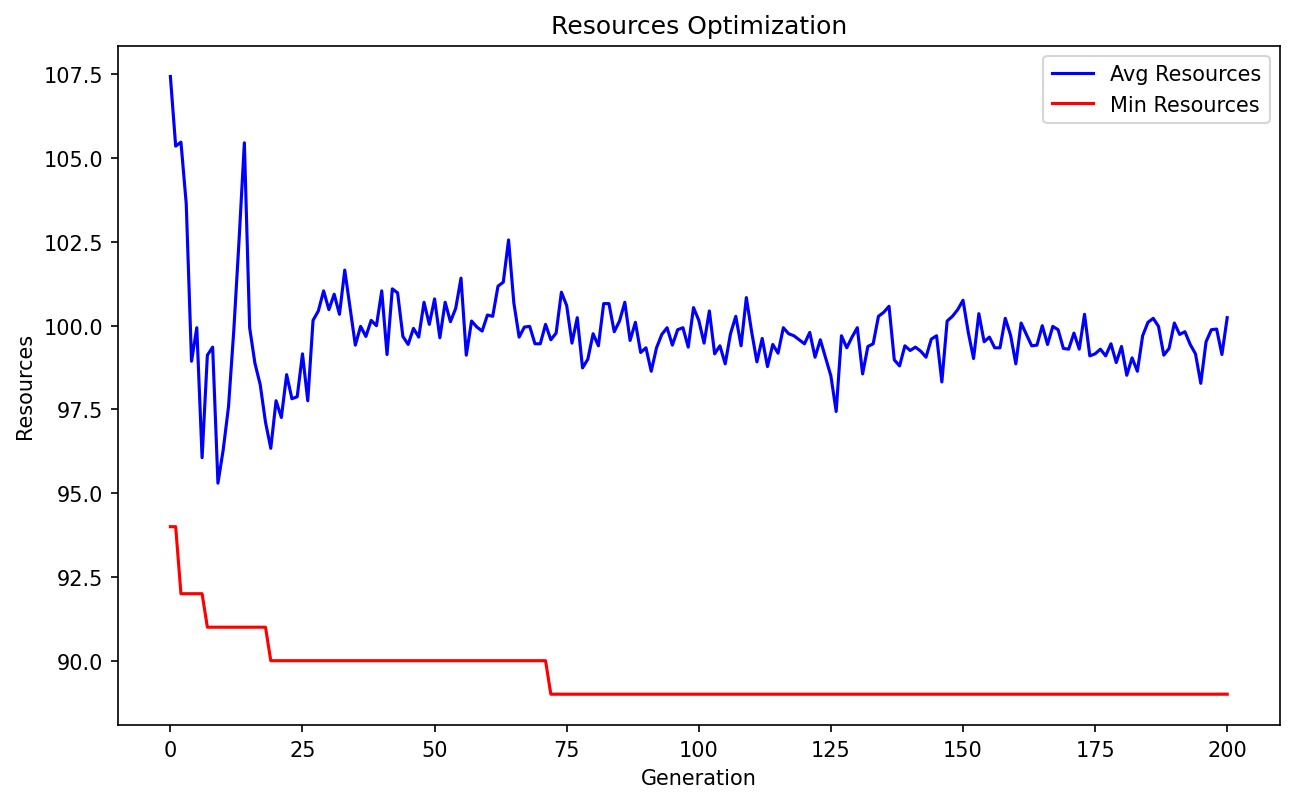

In [50]:
#绘制资源优化图片
plt.figure(figsize=(10, 6),dpi=150)
plt.plot(gen, avg_resources, label="Avg Resources", color='blue')
plt.plot(gen, min_resources, label="Min Resources", color='red')
plt.xlabel("Generation")
plt.ylabel("Resources")
plt.title("Resources Optimization")
plt.legend()
plt.savefig('resources_optimization.png')

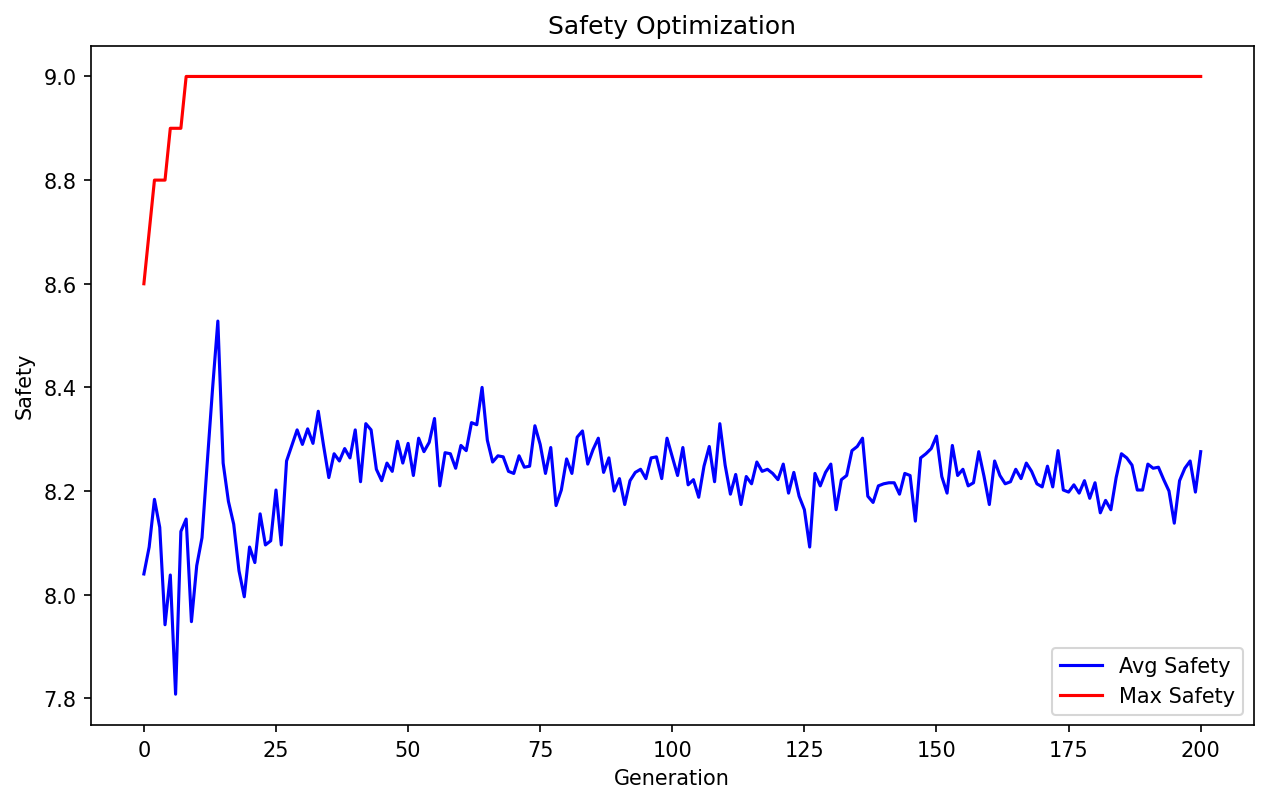

In [51]:
#绘制安全优化图片
plt.figure(figsize=(10, 6),dpi=150)
plt.plot(gen,-avg_safety, label="Avg Safety", color='blue')  # 这里是负的，因为我们最大化安全性
plt.plot(gen,-min_safety, label="Max Safety", color='red')
plt.xlabel("Generation")
plt.ylabel("Safety")
plt.title("Safety Optimization")
plt.legend()
plt.savefig('safety_optimization.png')

# 输出最优解

In [52]:
# 获取非支配解集
non_dominated_solutions = hof

Hall of Fame (Best Solutions):
[2, 0, 3, 2, 0, 4, 1, 2, 2, 3] (7.0, 89.0, -7.4)
[2, 0, 0, 2, 0, 4, 1, 2, 2, 3] (7.0, 90.0, -7.5)
[2, 3, 3, 2, 0, 4, 1, 2, 2, 3] (7.0, 90.0, -7.5)
[2, 0, 3, 1, 0, 4, 1, 2, 2, 3] (7.0, 90.0, -7.5)
[1, 0, 3, 2, 0, 4, 1, 2, 2, 3] (7.0, 90.0, -7.5)
[2, 3, 0, 2, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[2, 0, 0, 1, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 0, 1, 1, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 0, 3, 1, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 0, 0, 2, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[2, 3, 3, 1, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 3, 1, 2, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 3, 3, 2, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[2, 3, 0, 1, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 0, 0, 1, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 3, 0, 2, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 3, 1, 1, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 3, 3, 1, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 3, 0, 1, 0, 4, 1, 2, 2, 3] (7.0, 93.0, -7.800000000000001)
[1, 3, 0, 1, 0, 4, 1, 2,

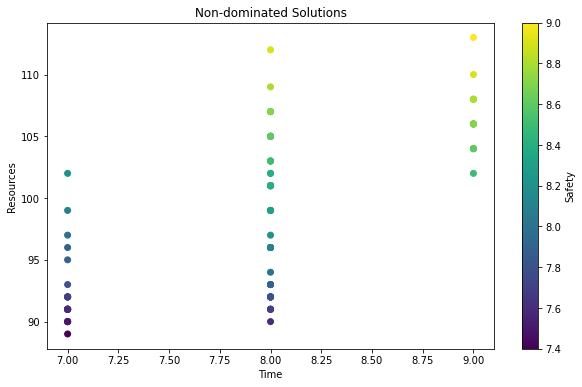

In [53]:
times = [ind.fitness.values[0] for ind in non_dominated_solutions]
resources = [ind.fitness.values[1] for ind in non_dominated_solutions]
safeties = [-ind.fitness.values[2] for ind in non_dominated_solutions]

plt.figure(figsize=(10, 6))
plt.scatter(times, resources, c=safeties, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Resources')
plt.colorbar(label='Safety')
plt.title('Non-dominated Solutions')

print("Hall of Fame (Best Solutions):")
for ind in non_dominated_solutions:
    print(ind, ind.fitness.values)

plt.show()

In [54]:
print("Hall of Fame (Best Solutions):")
for ind in hof:
    print(ind, ind.fitness.values)

Hall of Fame (Best Solutions):
[2, 0, 3, 2, 0, 4, 1, 2, 2, 3] (7.0, 89.0, -7.4)
[2, 0, 0, 2, 0, 4, 1, 2, 2, 3] (7.0, 90.0, -7.5)
[2, 3, 3, 2, 0, 4, 1, 2, 2, 3] (7.0, 90.0, -7.5)
[2, 0, 3, 1, 0, 4, 1, 2, 2, 3] (7.0, 90.0, -7.5)
[1, 0, 3, 2, 0, 4, 1, 2, 2, 3] (7.0, 90.0, -7.5)
[2, 3, 0, 2, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[2, 0, 0, 1, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 0, 1, 1, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 0, 3, 1, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 0, 0, 2, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[2, 3, 3, 1, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 3, 1, 2, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[1, 3, 3, 2, 0, 4, 1, 2, 2, 3] (7.0, 91.0, -7.6)
[2, 3, 0, 1, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 0, 0, 1, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 3, 0, 2, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 3, 1, 1, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 3, 3, 1, 0, 4, 1, 2, 2, 3] (7.0, 92.0, -7.7)
[1, 3, 0, 1, 0, 4, 1, 2, 2, 3] (7.0, 93.0, -7.800000000000001)
[1, 3, 0, 1, 0, 4, 1, 2,